In [1]:
# importing and configering libs

In [40]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',2000) # show all columns in jupyter
pd.set_option('display.max_rows', 100) # display 100 at least rows

In [3]:
# Loading the data

In [4]:
colsToLoad =["INSTNM","ADM_RATE","ADM_RATE_ALL","ACTCMMID","ACTENMID","ACTMTMID","ACTWRMID","SAT_AVG","SAT_AVG_ALL","SATMTMID","UGDS","HIGHDEG", "CONTROL", "TUITFTE", "INEXPFTE", "AVGFACSAL", "COSTT4_P",
             "COSTT4_A", "PCTFLOAN", "PCTPELL", "COMP_ORIG_YR2_RT","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN","UGDS_AIAN","UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","PPTUG_EF","COSTT4_A","TUITIONFEE_IN","TUITIONFEE_OUT","TUITIONFEE_PROG","TUITFTE","AVGFACSAL","DEATH_YR3_RT","COMP_ORIG_YR3_RT","LOAN_DEATH_YR3_RT","LOAN_COMP_ORIG_YR3_RT","DEATH_YR4_RT","COMP_ORIG_YR4_RT","COMPL_RPY_1YR_RT","NONCOM_RPY_1YR_RT","AGE_ENTRY","COUNT_NWNE_P10","COUNT_WNE_P10","MN_EARN_WNE_P10","MD_EARN_WNE_P10","COMPL_RPY_1YR_RT","NONCOM_RPY_1YR_RT","COMPL_RPY_3YR_RT","NONCOM_RPY_3YR_RT","COMPL_RPY_5YR_RT","NONCOM_RPY_5YR_RT","COMPL_RPY_7YR_RT","NONCOM_RPY_7YR_RT"]

# As each data row represent a specific institute , So we can use institute name as an index
index_feature = "INSTNM"

scoreCardDF = pd.read_csv("I:\\NU Project\\Git-Repo\\Data\\MERGED2013_14_PP.csv", index_col=index_feature, usecols=colsToLoad)
# ignore "MEDIAN_HH_INC" column, as 0 non-null float64

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1606) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# General exploration of data 

In [6]:
scoreCardDF.head()

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,SATMTMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,COMP_ORIG_YR2_RT,DEATH_YR3_RT,COMP_ORIG_YR3_RT,LOAN_DEATH_YR3_RT,LOAN_COMP_ORIG_YR3_RT,DEATH_YR4_RT,COMP_ORIG_YR4_RT,COMPL_RPY_1YR_RT,NONCOM_RPY_1YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,COMPL_RPY_5YR_RT,NONCOM_RPY_5YR_RT,COMPL_RPY_7YR_RT,NONCOM_RPY_7YR_RT,AGE_ENTRY,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10
INSTNM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,4,1,0.8989,0.8989,400.0,17.0,17.0,17.0,NaN,823.0,823.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,18888.0,NaN,7182.0,12774.0,NaN,9063.0,7459.0,7079.0,0.7115,0.8204,0.034958602,PrivacySuppressed,0.097451274,PrivacySuppressed,0.087332809,PrivacySuppressed,0.241845664,0.3075801749,0.1213692946,0.388185654,0.1768901569,0.5305514158,0.2299150882,0.7553324969,0.4143646409,20.540410133,246,1741,34300,29900
University of Alabama at Birmingham,4,1,0.8673,0.8673,585.0,25.0,26.0,23.0,NaN,1146.0,1146.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,19990.0,NaN,7206.0,16398.0,NaN,9033.0,17208.0,10170.0,0.3505,0.5397,0.150529204,PrivacySuppressed,0.333945628,PrivacySuppressed,0.332664527,PrivacySuppressed,0.422933112,0.578436134,0.3365384615,0.6351660939,0.4240231548,0.7312626604,0.5116761806,0.8288419519,0.6054718477,23.45881476,470,3474,46400,40200
Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671,0.3727,12300.0,NaN,6870.0,6870.0,NaN,12057.0,5123.0,3849.0,0.6839,0.7629,0.058823529,PrivacySuppressed,0.161849711,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.209580838,0.3859649123,0.1542699725,0.6226415094,0.3043478261,0.5192307692,0.4144144144,PrivacySuppressed,PrivacySuppressed,33.925581395,57,168,46100,40100
University of Alabama in Huntsville,4,1,0.8062,0.8062,580.0,26.0,26.0,25.0,NaN,1180.0,1180.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,20306.0,NaN,9192.0,21506.0,NaN,8322.0,9352.0,9341.0,0.3281,0.4728,0.157939189,PrivacySuppressed,0.284602076,PrivacySuppressed,0.283109405,PrivacySuppressed,0.393046107,0.639589169,0.3486956522,0.7177142857,0.3818860878,0.7959731544,0.474012474,0.8810810811,0.6389140271,24.10127697,188,1361,50500,45600
Alabama State University,4,1,0.5125,0.5125,425.0,17.0,17.0,17.0,NaN,830.0,830.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,17400.0,NaN,8720.0,15656.0,NaN,7813.0,7393.0,6557.0,0.8265,0.8735,0.028949025,PrivacySuppressed,0.115574348,PrivacySuppressed,0.10949464,PrivacySuppressed,0.187935035,0.2118863049,0.0985550204,0.3057553957,0.1694465504,0.4466019417,0.2263289037,0.7058823529,0.3645320197,20.648575305,285,1977,29500,26700


In [7]:
scoreCardDF.shape

(7804, 52)

In [8]:
scoreCardDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7804 entries, Alabama A & M University to Georgia Military College-Stone Mountain
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HIGHDEG                7804 non-null   int64  
 1   CONTROL                7804 non-null   int64  
 2   ADM_RATE               2221 non-null   float64
 3   ADM_RATE_ALL           2486 non-null   float64
 4   SATMTMID               1317 non-null   float64
 5   ACTCMMID               1344 non-null   float64
 6   ACTENMID               1167 non-null   float64
 7   ACTMTMID               1168 non-null   float64
 8   ACTWRMID               300 non-null    float64
 9   SAT_AVG                1422 non-null   float64
 10  SAT_AVG_ALL            1532 non-null   float64
 11  UGDS                   7091 non-null   float64
 12  UGDS_WHITE             7091 non-null   float64
 13  UGDS_BLACK             7091 non-null   float64
 14  UGD

In [9]:
# Assuming that the output or target variable is COMPL_RPY_1YR_RT
target_feature = "COMPL_RPY_1YR_RT"

In [10]:
# get the number of null values at each column to check if target variable COMPL_RPY_1YR_RT has null at any rows or not
scoreCardDF.isnull().sum()

HIGHDEG                     0
CONTROL                     0
ADM_RATE                 5583
ADM_RATE_ALL             5318
SATMTMID                 6487
ACTCMMID                 6460
ACTENMID                 6637
ACTMTMID                 6636
ACTWRMID                 7504
SAT_AVG                  6382
SAT_AVG_ALL              6272
UGDS                      713
UGDS_WHITE                713
UGDS_BLACK                713
UGDS_HISP                 713
UGDS_ASIAN                713
UGDS_AIAN                 713
UGDS_NHPI                 713
UGDS_2MOR                 713
UGDS_NRA                  713
UGDS_UNKN                 713
PPTUG_EF                  732
COSTT4_A                 3665
COSTT4_P                 5261
TUITIONFEE_IN            3298
TUITIONFEE_OUT           3517
TUITIONFEE_PROG          5056
TUITFTE                   442
INEXPFTE                  442
AVGFACSAL                3150
PCTPELL                   741
PCTFLOAN                  741
COMP_ORIG_YR2_RT          207
DEATH_YR3_

In [11]:
# Data preprocessing

In [12]:
# drop all rows that do not have a value for out target variable
scoreCardDF = scoreCardDF[(scoreCardDF[target_feature] != "PrivacySuppressed")\
                          & (scoreCardDF[target_feature] != np.nan)\
                          & (scoreCardDF[target_feature] != None)\
                          &(scoreCardDF[target_feature].notna())]
scoreCardDF.shape

(5632, 52)

In [13]:
# Extract input features by exluding the index feature and target output feature from the loadd features
input_features =  [f for f in colsToLoad if f not in [index_feature,target_feature]] 
# Specify categorial features columns
cat_columns = ["HIGHDEG","CONTROL"]
# Extract input float features by excluding categorial features
float_columns = [f for f in input_features if f not in cat_columns]

In [14]:
# As some columns have PrivacySuppressed as a value to indicate that the value is missing/hidden due to data privacy
# we define function that loop across all columns (features) to replace "PrivacySuppressed" value with null/nan 
# and convert it into float type
def cleanPrivacySuppressed(dataFrame):
    for colName in dataFrame.columns:
        dataFrame[colName] = dataFrame[colName].replace("PrivacySuppressed", np.nan)
        dataFrame[colName] = dataFrame[colName].astype(float)
    return dataFrame

# Build an estimator for this function to be used by ML pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class PrivacySuppressedHandler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        return cleanPrivacySuppressed(X)

In [15]:
# pipeline for all float columns
# it is a separate pipline, because there is a potential to add more preprocessing steps based on model evaluation
float_pipeline = ColumnTransformer([("privacy_suppressed_handler", PrivacySuppressedHandler(),float_columns)])

In [16]:
# pipeline for all Categoricol (discrete) columns
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = ColumnTransformer([("hot_encoder",OneHotEncoder(sparse=False),cat_columns)])

In [17]:
# Build a full pipeline for preprocessing by merge these two pipelines in one
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[("float_pipeline", float_pipeline),("cat_pipeline", cat_pipeline)])

In [18]:
# Execute the preprocessing pipeline of the input features
processed_input_features = full_pipeline.fit_transform(scoreCardDF)
processed_input_features = pd.DataFrame(processed_input_features)
target_output = scoreCardDF[target_feature]

In [19]:
# Split the data into training and test sets with ration 80 / 20
input_train, input_test, output_train, output_test =\
    train_test_split(processed_input_features, target_output.values, test_size=0.2, random_state=0)

In [20]:
# see coefficient and p-value
# import statsmodels.api as sm
# regressor_OLS = sm.OLS(np.asarray(output_train), np.asarray(input_train)).fit()
# print(regressor_OLS.summary())

In [21]:
# deine function to impute/replace null values with mean value across all columns of training datafram using scikit learn imputer
from sklearn.impute import SimpleImputer
def imputeNullWithMean(dataFrame):
    imputer = SimpleImputer(strategy='mean')
    imputed_data = pd.DataFrame(imputer.fit_transform(dataFrame), columns=dataFrame.columns)
    return imputed_data , imputer

In [22]:
# imputation using mean value
input_train ,imputer = imputeNullWithMean(input_train)
input_test = imputer.fit_transform(input_test)
#input_train.isnull().sum()

In [23]:
# Training the algorithm (Multiple Linear Regression)
regressor = LinearRegression()
regressor.fit(input_train, output_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# To make predictions on the test data
output_pred = regressor.predict(input_test)

# To mak prediction on the training data to be used laterly while comparing error metrices for both 
# data sets to chech model overfitting or underfitting
output_train_pred = regressor.predict(input_train)

In [25]:
# To compare the actual output values for input_test which is (output_test) with the predicted values output_pred
df = pd.DataFrame({'Actual': output_test, 'Predicted': output_pred})
df

,Actual,Predicted
0,0.4418777943,0.476561
1,0.6991869919,0.660840
2,0.2754491018,0.205245
3,0.4281217209,0.449910
4,0.6611295681,0.543070
...,...,...
1122,0.575,0.536453
1123,0.5616024187,0.572241
1124,0.5319148936,0.542537
1125,0.3049327354,0.302358


In [29]:
# The final step is to evaluate the performance of algorithm on training set and test set
# We'll do this by finding the values for MAE, MSE, RMSE, and RSE 
# for training and testing set to discover any overfitting or underfitting
print('Train - Mean Absolute Error:', metrics.mean_absolute_error(output_train, output_train_pred))
print('Test - Mean Absolute Error:', metrics.mean_absolute_error(output_test, output_pred))
print('\n')
print('Train - Mean Squared Error:', metrics.mean_squared_error(output_train, output_train_pred))
print('Test - Mean Squared Error:', metrics.mean_squared_error(output_test, output_pred))
print('\n')
print('Train - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_train, output_train_pred)))
print('Test - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_test, output_pred)))
print('\n')
print('Train - Root Squared Error:', r2_score(output_train, output_train_pred))
print('Test - Root Squared Error:', r2_score(output_test, output_pred))

Train - Mean Absolute Error: 0.03866794367910979
Test - Mean Absolute Error: 0.037945755798300215


Train - Mean Squared Error: 0.0030801055382675803
Test - Mean Squared Error: 0.0029987239354586563


Train - Root Mean Squared Error: 0.055498698527691445
Test - Root Mean Squared Error: 0.0547606056892969


Train - Root Squared Error: 0.9208701144030308
Test - Root Squared Error: 0.9239619993541


In [33]:
# Model Evaluation using Cross Validation 10 fold and root squared
cross_val_score(regressor, input_train, output_train, cv=10 ,scoring='r2')

array([  0.92615863,   0.92606231,   0.91646187,   0.90792889,
         0.90953176,   0.9269274 ,   0.9148544 ,   0.92280611,
         0.92624549, -11.05462303])

In [32]:
# Model Evaluation using Cross Validation 10 fold and RMSE
cross_val_score(regressor, input_train, output_train, cv=10 ,scoring='neg_root_mean_squared_error')

array([-0.0541763 , -0.05356604, -0.05697876, -0.05687281, -0.06128365,
       -0.05394687, -0.05663471, -0.05703236, -0.05352688, -0.65830244])

In [34]:
# catHotColumns is how oneHotEncoder treats HIGHDEG AND CONTROL in preprocessing
catHotColumns =["HIGHDEG_Non-degree-granting","HIGHDEG_Certificate_degree","HIGHDEG_Associate_degree","HIGHDEG_Associate_degree","HIGHDEG_Associate_degree","CONTROL_Public","CONTROL_Private_nonprofit","CONTROL_Private for-profit"]
# ADD all toghether. this is the structre that gets out from the preprocessing pipline
all_features = float_columns.copy()
all_features.extend(catHotColumns)

In [35]:
x = regressor.coef_
x.sort()
x

array([-1.22937156e+02, -4.45256817e+00, -8.17036493e-02, -8.02608686e-02,
       -7.90324213e-02, -5.76017554e-02, -5.01007117e-02, -4.03046135e-02,
       -3.40994589e-02, -3.01590479e-02, -2.79743527e-02, -2.45729049e-02,
       -2.01958226e-02, -1.58401102e-02, -1.29047234e-02, -6.68010632e-03,
       -6.41181713e-03, -2.93290177e-03, -2.92992874e-03, -2.59809779e-03,
       -1.94617365e-03, -1.40337429e-03, -9.47058086e-04, -3.33144649e-05,
       -4.47699582e-06, -1.69588797e-06, -9.05868059e-07, -8.76720743e-07,
       -8.11997690e-07, -2.77578069e-07, -1.74806137e-07, -9.34106073e-08,
        8.42543941e-08,  2.94412221e-07,  4.37509390e-07,  7.18034171e-07,
        8.58068042e-07,  1.05055762e-06,  1.85326258e-06,  3.58412332e-06,
        2.98977761e-05,  4.58266569e-05,  1.83820886e-03,  3.10683614e-03,
        4.69185973e-03,  7.24798439e-03,  7.66721668e-03,  8.17289312e-03,
        8.97045108e-03,  1.85420894e-02,  2.10740757e-02,  2.74795621e-02,
        3.14890906e-02,  

In [52]:
# get the features importance 
feature_name_importance = zip(all_features, regressor.coef_)
sorted(feature_name_importance, key=lambda x: x[1], reverse=True)

[('CONTROL_Private for-profit', 1.2658145960507845),
 ('CONTROL_Private_nonprofit', 0.49491238985552866),
 ('CONTROL_Public', 0.2645913398129596),
 ('HIGHDEG_Associate_degree', 0.26459133940678803),
 ('HIGHDEG_Associate_degree', 0.11608601338427837),
 ('HIGHDEG_Associate_degree', 0.05580595451731935),
 ('HIGHDEG_Certificate_degree', 0.04199804995270482),
 ('HIGHDEG_Non-degree-granting', 0.03323450286632271),
 ('NONCOM_RPY_7YR_RT', 0.03148909056294172),
 ('COMPL_RPY_7YR_RT', 0.027479562100561183),
 ('NONCOM_RPY_5YR_RT', 0.02107407568552368),
 ('COMPL_RPY_5YR_RT', 0.018542089363651842),
 ('NONCOM_RPY_3YR_RT', 0.008970451080388036),
 ('COMPL_RPY_3YR_RT', 0.008172893119663151),
 ('NONCOM_RPY_1YR_RT', 0.007667216684525413),
 ('MD_EARN_WNE_P10', 0.007247984390725629),
 ('MN_EARN_WNE_P10', 0.004691859734811759),
 ('COUNT_WNE_P10', 0.003106836139534447),
 ('COUNT_NWNE_P10', 0.001838208864115011),
 ('AGE_ENTRY', 4.582665686965489e-05),
 ('NONCOM_RPY_1YR_RT', 2.9897776058079712e-05),
 ('COMP_ORI

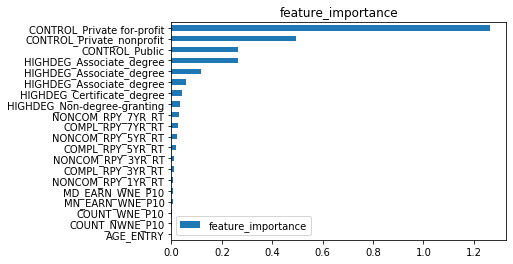

In [53]:
feature_importance_df =pd.DataFrame(data=regressor.coef_, index=all_features, columns=["feature_importance"])
ax = feature_importance_df.sort_values("feature_importance", ascending=False).head(20).plot(kind='barh',title='feature_importance')
ax.invert_yaxis()

In [47]:
# parameter tuning using Grid Search technique to get the best parameters
# regressor.get_params().keys()
params = {'fit_intercept':[True , False],'normalize':[True , False],'copy_X': [True , False], 'n_jobs':[None]}
regressor_gs = GridSearchCV(regressor, params, cv=10, verbose=1)
regressor_gs.fit(input_train, output_train) 
print("Best Params : ", regressor_gs.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params :  {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.3s finished


In [48]:
# Try model again using best params
regressor_best = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)
regressor_best.fit(input_train, output_train) 

output_pred_best = regressor_best.predict(input_test)
output_train_pred_best = regressor_best.predict(input_train)

In [49]:
# The final step is to evaluate the performance of algorithm on training set and test set after using best parameters
# We'll do this by finding the values for MAE, MSE, RMSE, and RSE 
# for training and testing set again to discover any overfitting or underfitting
print('(Best_Param) Train - Mean Absolute Error:', metrics.mean_absolute_error(output_train, output_train_pred_best))
print('(Best_Param) Test - Mean Absolute Error:', metrics.mean_absolute_error(output_test, output_pred_best))
print('\n')
print('(Best_Param) Train - Mean Squared Error:', metrics.mean_squared_error(output_train, output_train_pred_best))
print('(Best_Param) Test - Mean Squared Error:', metrics.mean_squared_error(output_test, output_pred_best))
print('\n')
print('(Best_Param) Train - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_train, output_train_pred_best)))
print('(Best_Param) Test - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_test, output_pred_best)))
print('\n')
print('(Best_Param) Train - Root Squared Error:', r2_score(output_train, output_train_pred_best))
print('(Best_Param) Test - Root Squared Error:', r2_score(output_test, output_pred_best))

(Best_Param) Train - Mean Absolute Error: 0.03866794367906812
(Best_Param) Test - Mean Absolute Error: 0.03794575579825707


(Best_Param) Train - Mean Squared Error: 0.003080105538267581
(Best_Param) Test - Mean Squared Error: 0.002998723935459001


(Best_Param) Train - Root Mean Squared Error: 0.05549869852769145
(Best_Param) Test - Root Mean Squared Error: 0.05476060568930005


(Best_Param) Train - Root Squared Error: 0.9208701144030308
(Best_Param) Test - Root Squared Error: 0.9239619993540913


In [50]:
# get the features importance uing estimator with best params 
feature_name_importance = zip(all_features, regressor_best.coef_)
sorted(feature_name_importance, key=lambda x: x[1], reverse=True)

[('DEATH_YR4_RT', 1.2658145960506013),
 ('COMPL_RPY_3YR_RT', 0.4949123898555408),
 ('CONTROL_Private_nonprofit', 0.3281324988161368),
 ('CONTROL_Public', 0.3276268223809865),
 ('CONTROL_Private for-profit', 0.30411949545046074),
 ('NONCOM_RPY_1YR_RT', 0.26459133962532894),
 ('NONCOM_RPY_1YR_RT', 0.26459133959437314),
 ('HIGHDEG_Associate_degree', 0.19922374763413575),
 ('HIGHDEG_Certificate_degree', 0.19666762297822538),
 ('HIGHDEG_Non-degree-granting', 0.18937766544910034),
 ('HIGHDEG_Associate_degree', 0.18904583450666454),
 ('HIGHDEG_Associate_degree', 0.18556394611277863),
 ('COMPL_RPY_5YR_RT', 0.1160860133842687),
 ('UGDS_NHPI', 0.055805954517738066),
 ('COMP_ORIG_YR4_RT', 0.04199804995266747),
 ('ADM_RATE_ALL', 0.033234502863060386),
 ('COMPL_RPY_7YR_RT', 0.031489090562935876),
 ('PPTUG_EF', 0.027479562100588096),
 ('UGDS_AIAN', 0.021074075685899224),
 ('COMP_ORIG_YR2_RT', 0.018542089363371105),
 ('COMP_ORIG_YR3_RT', 0.008970451080473462),
 ('LOAN_COMP_ORIG_YR3_RT', 0.00310683613

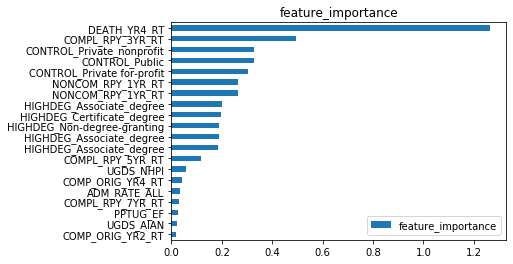

In [51]:
feature_importance_df =pd.DataFrame(data=regressor_best.coef_, index=all_features, columns=["feature_importance"])
ax = feature_importance_df.sort_values("feature_importance", ascending=False).head(20).plot(kind='barh',title='feature_importance')
ax.invert_yaxis()